In [37]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

path = "/content/drive/MyDrive/Colab Notebooks/Chocolate_Sales.csv"
df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

In [39]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Chocolate_Sales.csv")

# Display first 5 rows
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


The dataset contains X rows and Y columns.
It includes numerical and categorical features.

In [40]:
# Shape of dataset (rows, columns)
df.shape

(3282, 6)

In [41]:
# Data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


In [42]:
# Descriptive statistics
df.describe(include='all')

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
count,3282,3282,3282,3282,3282,3282.000000
unique,25,6,22,504,3013,NaN
top,Kelci Walkden,Australia,Eclairs,13/01/2024,"$2,317.00",NaN
freq,162,615,180,16,5,NaN
mean,NaN,NaN,NaN,NaN,NaN,164.666971
std,NaN,NaN,NaN,NaN,NaN,124.024736
min,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,71.000000
50%,NaN,NaN,NaN,NaN,NaN,137.000000
75%,NaN,NaN,NaN,NaN,NaN,232.000000


The dataset contains information about chocolate sales including country, product, boxes shipped, and total sales amount.


In [43]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [44]:
# Remove dollar sign and convert to numeric
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True)
df['Amount'] = pd.to_numeric(df['Amount'])

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3313926319.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True)


In [45]:
# Check missing values
df.isna().sum()

,0
Sales Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes Shipped,0


In [46]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

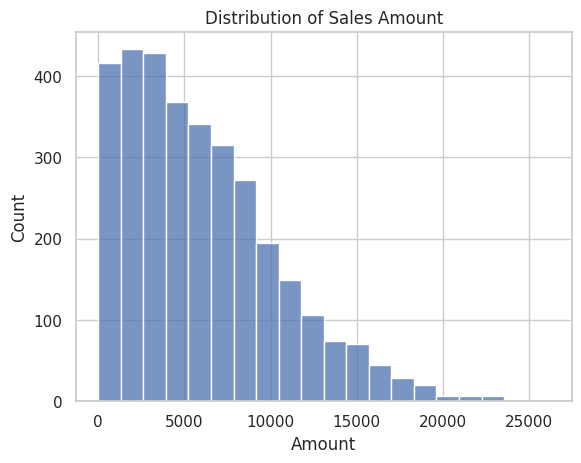

In [47]:
plt.figure()
sns.histplot(df['Amount'], bins=20)
plt.title("Distribution of Sales Amount")
plt.show()

The sales amount distribution appears slightly skewed, indicating variation in transaction sizes.

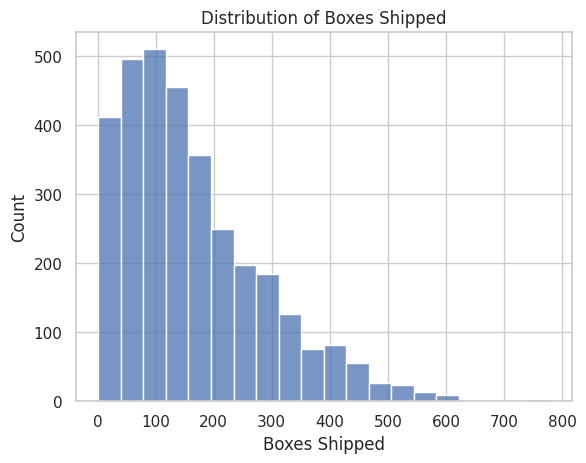

In [48]:
plt.figure()
sns.histplot(df['Boxes Shipped'], bins=20)
plt.title("Distribution of Boxes Shipped")
plt.show()

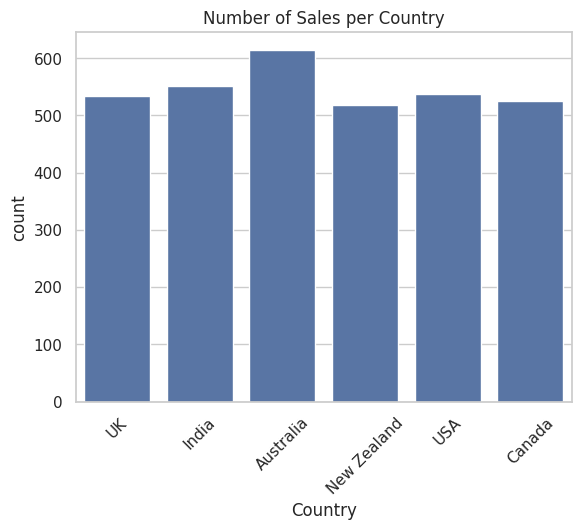

In [49]:
plt.figure()
sns.countplot(x='Country', data=df)
plt.xticks(rotation=45)
plt.title("Number of Sales per Country")
plt.show()

In [50]:
df.groupby('Country')['Amount'].sum().sort_values(ascending=False)


,Amount
Country,
Australia,3646444.35
UK,3365388.90
India,3343730.83
USA,3313858.09
Canada,3078495.65
New Zealand,3043654.04


Some countries generate significantly higher total revenue compared to others.

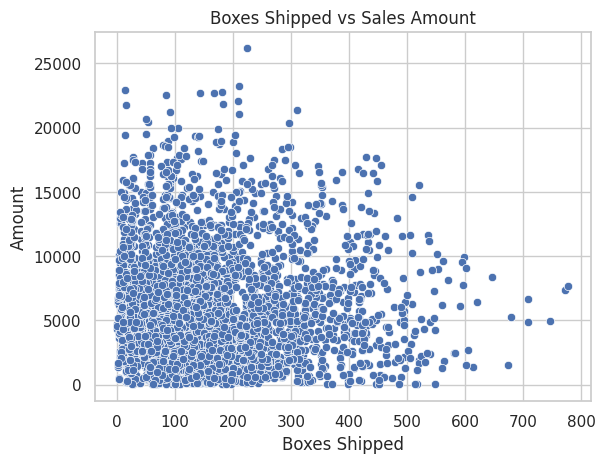

In [51]:
plt.figure()
sns.scatterplot(x='Boxes Shipped', y='Amount', data=df)
plt.title("Boxes Shipped vs Sales Amount")
plt.show()

There is a positive relationship between the number of boxes shipped and the total sales amount.

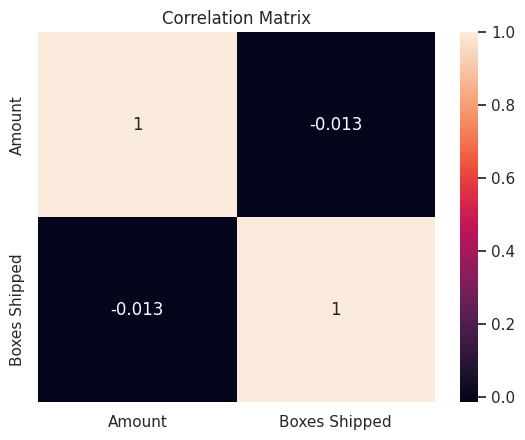

In [52]:
plt.figure()
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix")
plt.show()

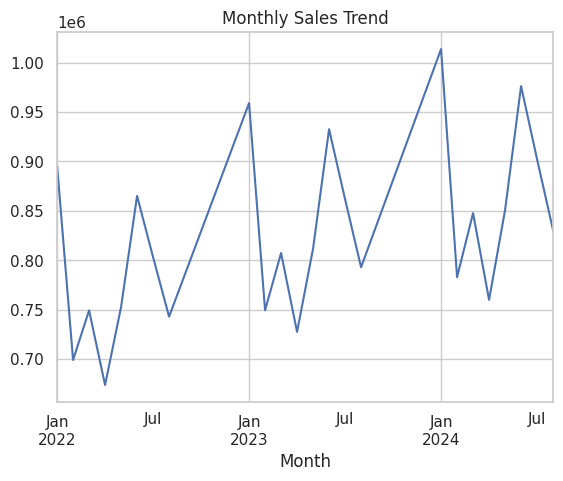

In [53]:
# Extract Month
df['Month'] = df['Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Amount'].sum()

plt.figure()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.show()

The monthly trend shows fluctuations in sales over time, indicating possible seasonality.

**Conclusion:**

bold textThe exploratory data analysis revealed meaningful insights about chocolate sales performance.

There is a clear positive relationship between boxes shipped and total revenue.

Sales vary across countries and show monthly fluctuations, suggesting potential seasonal patterns.